In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score, ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import  train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Activation, Conv1D,Flatten,LSTM, MaxPooling1D,GlobalMaxPool1D
from scipy.stats import randint
from statistics import mode
import keras
import pickle
import warnings
warnings.filterwarnings("ignore")

2024-05-06 16:29:16.913412: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 16:29:16.913524: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 16:29:17.198736: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df1 = pd.read_csv(r'/kaggle/input/water-potability-datasets/train_dataset.csv')
df1

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,219.674262,22210.613083,5.875041,333.775777,398.517703,11.502316,112.412210,2.994259,0
1,6.783888,193.653581,13677.106441,5.171454,323.728663,477.854687,15.056064,66.396293,3.250022,0
2,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287,1
3,8.097454,218.992436,18112.284447,6.196947,333.775777,376.569803,17.746264,59.909941,4.279082,1
4,8.072612,210.269780,16843.363927,8.793459,359.516169,559.167574,17.263576,68.738989,5.082206,0
...,...,...,...,...,...,...,...,...,...,...
2288,8.124208,207.509515,26489.114701,8.540837,318.059624,431.625677,10.075598,63.984225,4.724457,0
2289,10.391942,262.741770,39116.682706,3.205786,285.728420,473.313969,13.300688,65.318816,5.771715,0
2290,7.790875,196.478712,24061.349596,6.785685,350.117254,471.518536,15.343316,44.544627,3.076214,0
2291,6.139743,168.444214,23894.136010,9.494582,318.026087,494.129125,19.116022,60.264767,3.841222,0


In [3]:
df2 = pd.read_csv(r'/kaggle/input/water-potability-datasets/water_potability.csv')
df2

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


## Concattenating Two Datasets About Water Potability

In [4]:
df = pd.concat([df1,df2],ignore_index= True)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,219.674262,22210.613083,5.875041,333.775777,398.517703,11.502316,112.412210,2.994259,0
1,6.783888,193.653581,13677.106441,5.171454,323.728663,477.854687,15.056064,66.396293,3.250022,0
2,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287,1
3,8.097454,218.992436,18112.284447,6.196947,333.775777,376.569803,17.746264,59.909941,4.279082,1
4,8.072612,210.269780,16843.363927,8.793459,359.516169,559.167574,17.263576,68.738989,5.082206,0
...,...,...,...,...,...,...,...,...,...,...
5564,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
5565,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
5566,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
5567,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [5]:
df.drop_duplicates() # there is more 1000 duplicated row

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,219.674262,22210.613083,5.875041,333.775777,398.517703,11.502316,112.412210,2.994259,0
1,6.783888,193.653581,13677.106441,5.171454,323.728663,477.854687,15.056064,66.396293,3.250022,0
2,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287,1
3,8.097454,218.992436,18112.284447,6.196947,333.775777,376.569803,17.746264,59.909941,4.279082,1
4,8.072612,210.269780,16843.363927,8.793459,359.516169,559.167574,17.263576,68.738989,5.082206,0
...,...,...,...,...,...,...,...,...,...,...
5563,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
5565,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
5566,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
5567,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5569 entries, 0 to 5568
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               5078 non-null   float64
 1   Hardness         5569 non-null   float64
 2   Solids           5569 non-null   float64
 3   Chloramines      5569 non-null   float64
 4   Sulfate          4788 non-null   float64
 5   Conductivity     5569 non-null   float64
 6   Organic_carbon   5569 non-null   float64
 7   Trihalomethanes  5407 non-null   float64
 8   Turbidity        5569 non-null   float64
 9   Potability       5569 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 435.2 KB


In [7]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,5078.000000,5569.000000,5569.000000,5569.000000,4788.000000,5569.000000,5569.000000,5407.000000,5569.000000,5569.000000
mean,7.081459,196.378076,22038.897115,7.126687,333.592629,425.896546,14.261997,66.440069,3.966937,0.390196
std,1.546209,32.704916,8726.855342,1.579168,38.964881,80.588644,3.321714,16.128198,0.783656,0.487838
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.151161,176.793152,15741.081627,6.132132,311.790620,365.091587,12.049131,55.961613,3.439740,0.000000
50%,7.080795,196.900098,21043.626929,7.132154,333.775777,421.343736,14.189856,66.396293,3.952594,0.000000
75%,7.976508,216.647068,27336.962624,8.109346,355.443721,481.341774,16.521942,77.286551,4.501457,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Handling Missing Values

In [8]:
df.isna().sum() # ph , Sulfate , Trihalomethanes

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
df.isna().sum() / len(df) * 100 # Missing Values Percentage %

ph                  8.816664
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            14.024062
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     2.908960
Turbidity           0.000000
Potability          0.000000
dtype: float64

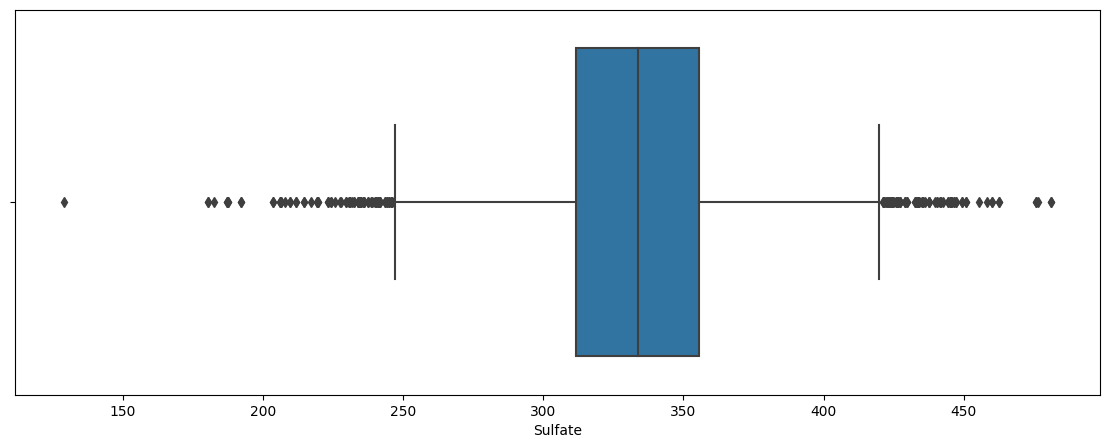

In [10]:
# Sulfate box plot
plt.figure(figsize= (14,5))
sns.boxplot(df, x= df['Sulfate'])
plt.show()

In [11]:
df['Sulfate'].median()

333.7757766108135

In [12]:
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].median())
df[['Sulfate']]

,Sulfate
0,333.775777
1,323.728663
2,421.486089
3,333.775777
4,359.516169
...,...
5564,359.948574
5565,333.775777
5566,333.775777
5567,333.775777


In [13]:
mode(df['ph'])

7.080794504276835

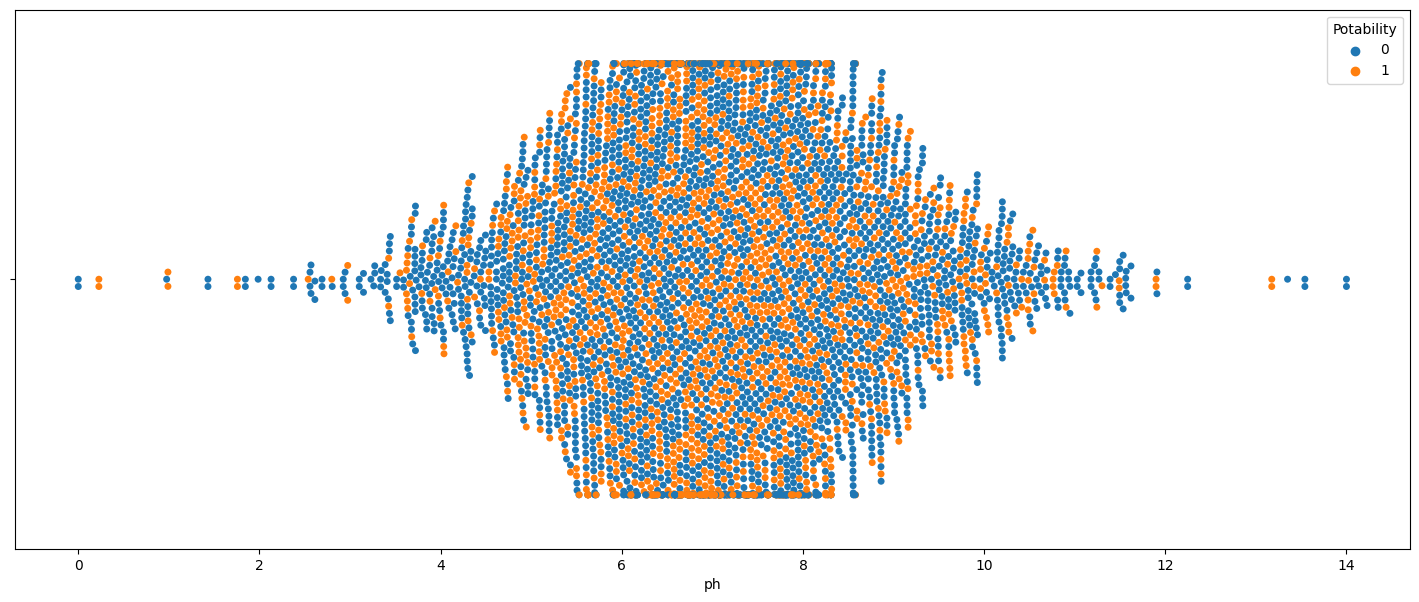

In [14]:
plt.figure(figsize= (18,7))
sns.swarmplot(df,x= 'ph', hue = "Potability")
plt.show()

In [15]:
df['ph'] = df['ph'].fillna(mode(df['ph']))
df[['ph']]

,ph
0,7.080795
1,6.783888
2,6.010618
3,8.097454
4,8.072612
...,...
5564,4.668102
5565,7.808856
5566,9.419510
5567,5.126763


In [16]:
df.isna().sum() / len(df) * 100

ph                 0.00000
Hardness           0.00000
Solids             0.00000
Chloramines        0.00000
Sulfate            0.00000
Conductivity       0.00000
Organic_carbon     0.00000
Trihalomethanes    2.90896
Turbidity          0.00000
Potability         0.00000
dtype: float64

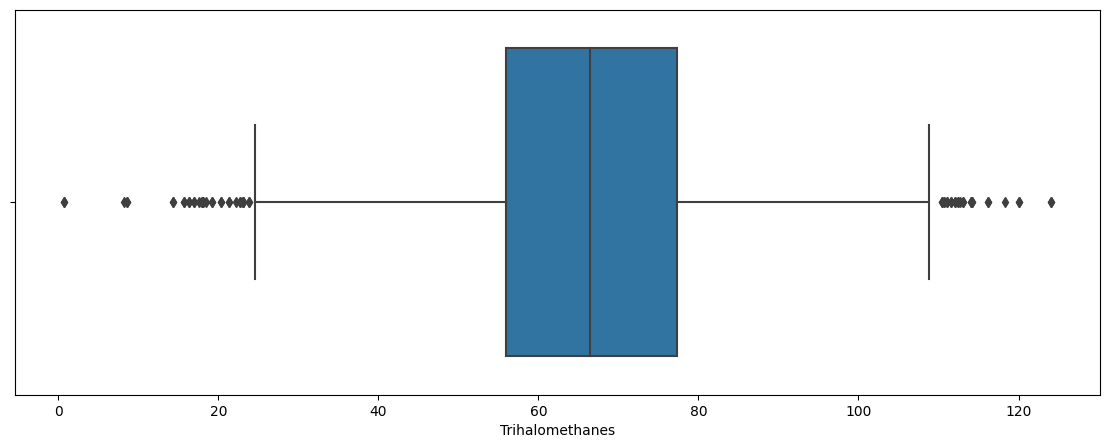

In [17]:
plt.figure(figsize= (14,5))
sns.boxplot(df, x= df['Trihalomethanes'])
plt.show()

In [18]:
df['Trihalomethanes'].describe() # mean and median is almost equal

count    5407.000000
mean       66.440069
std        16.128198
min         0.738000
25%        55.961613
50%        66.396293
75%        77.286551
max       124.000000
Name: Trihalomethanes, dtype: float64

In [19]:
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())
df[['Trihalomethanes']]

,Trihalomethanes
0,112.412210
1,66.396293
2,83.707938
3,59.909941
4,68.738989
...,...
5564,66.687695
5565,66.440069
5566,69.845400
5567,77.488213


In [20]:
df.isna().sum() / len(df) * 100 # Now , Data is Clean

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

## Counting Potabilty Values & Check if there is correlation between colums

In [21]:
df['Potability'].value_counts()

Potability
0    3396
1    2173
Name: count, dtype: int64

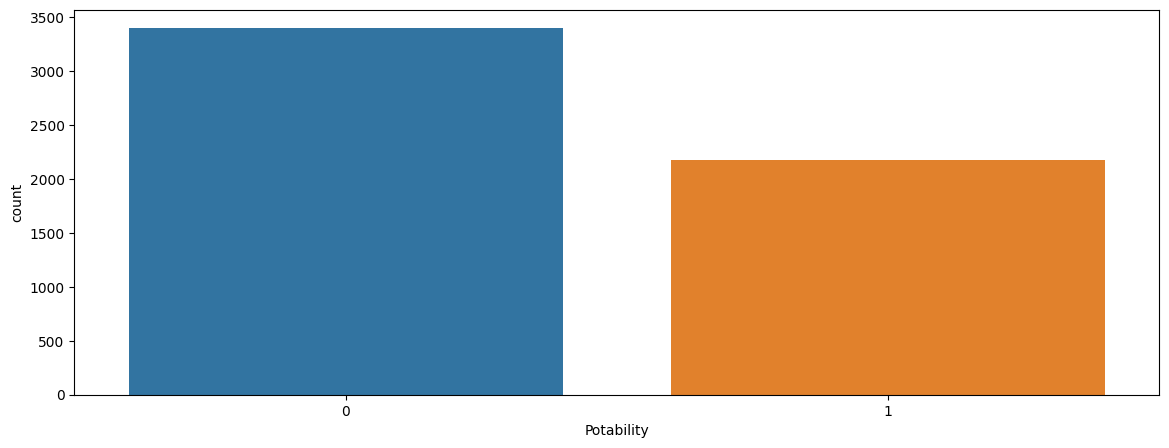

In [22]:
# Counting Water Potability
plt.figure(figsize= (14,5))
sns.countplot(df, x= df['Potability'])
plt.show()

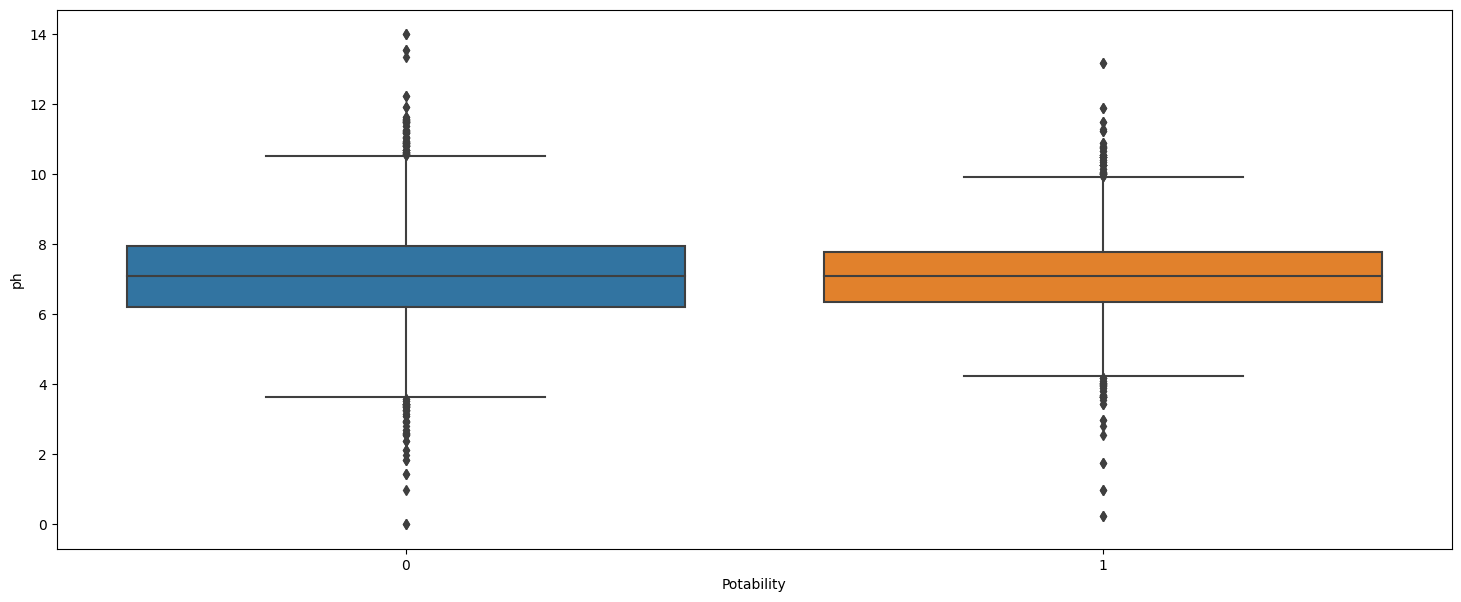

In [23]:
# Boxplot Water Potability based on ph
plt.figure(figsize= (18,7))
sns.boxplot(df,y='ph',x='Potability')
plt.show()

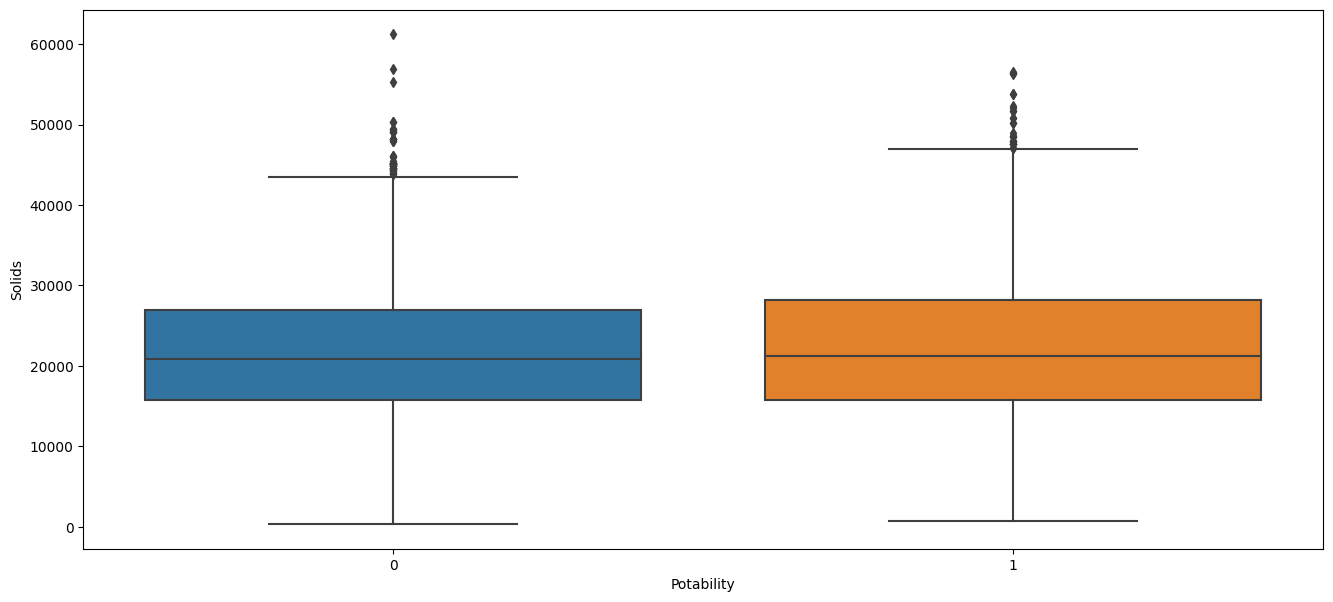

In [24]:
# Boxplot Water Potability based on solids
plt.figure(figsize= (16,7))
sns.boxplot(df,y='Solids',x='Potability')
plt.show()

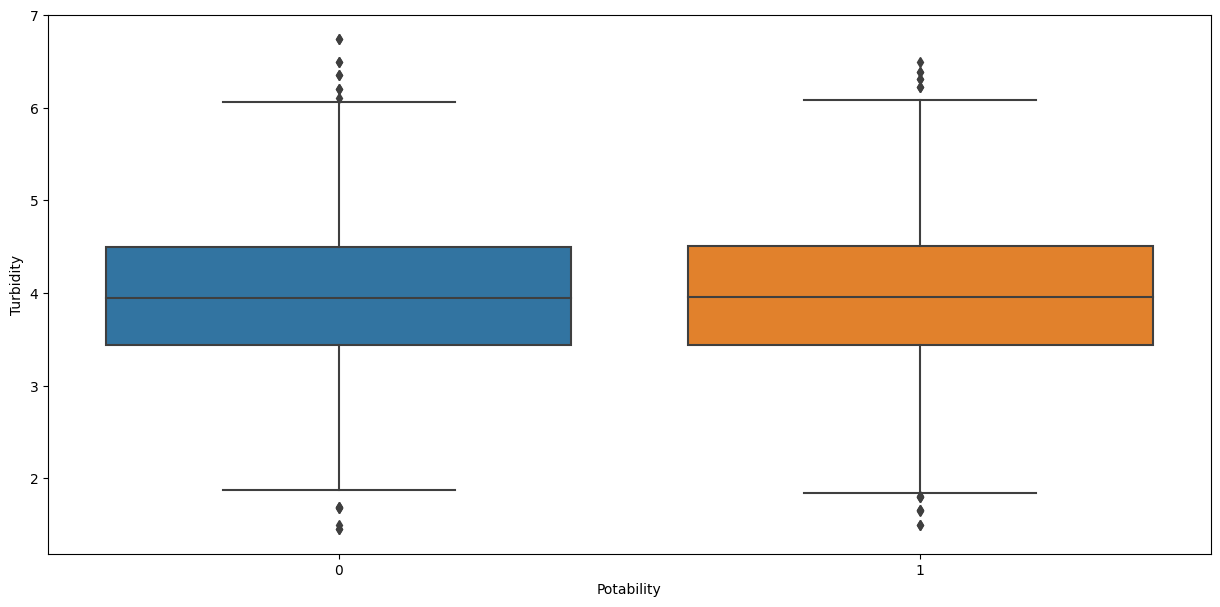

In [25]:
# Boxplot Water Potability based on Turbidity
plt.figure(figsize= (15,7))
sns.boxplot(df,y='Turbidity',x='Potability')
plt.show()

In [26]:
# Check which parameters are correlated with "Potability".
df_corr = df.corr() * 100
df_corr["Potability"].sort_values(ascending = False) 

Potability         100.000000
Solids               4.113751
Chloramines          1.992613
Trihalomethanes      0.494789
Turbidity           -0.009091
ph                  -0.519205
Conductivity        -1.243167
Hardness            -1.738437
Sulfate             -2.028356
Organic_carbon      -2.112737
Name: Potability, dtype: float64

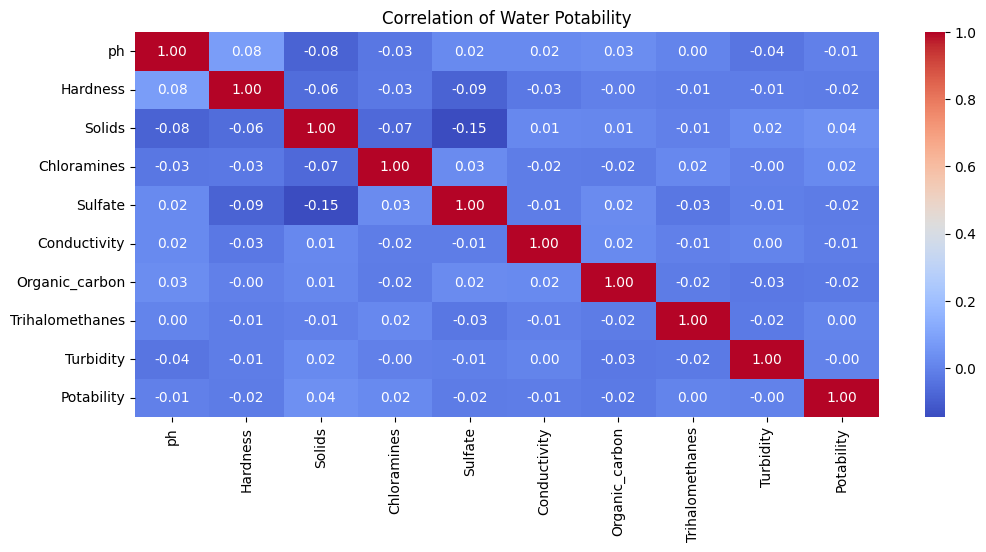

In [27]:
plt.figure(figsize= (12,5))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f')
plt.title("Correlation of Water Potability")
plt.show()

In [28]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

## Split the Data & Applying Border Line SMOTE

In [29]:
# Split the data into features (X) and target (y)
X = df.drop('Potability', axis=1)
y = df['Potability']

smote = BorderlineSMOTE(random_state = 42, kind = 'borderline-2')
X_smote, y_smote = smote.fit_resample(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

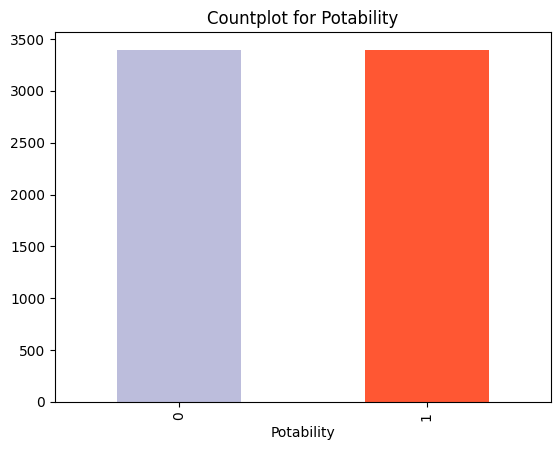

In [30]:
y_smote.value_counts().plot(kind = 'bar', color = ["#bcbddc", "#FF5733"])
plt.title("Countplot for Potability")
plt.show()

# Train Random Forest Model

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_score = round(rf.score(X_test, y_test), 3)
print("Random Forest Score:", rf_score)

Random Forest Score: 0.898


# Create a Function to plot Confusion Matrix & Classification Report

In [32]:
# A function to plot "Confusion Matrix" and "Classification Report"
def plot_result(y_pred) :
    '''
    1) plot Confusion Matrix
    2) plot Classification Report
    '''
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    fig.tight_layout()
    #AX left - Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    ax[0]=sns.heatmap(cm, cmap='Blues', annot=True, fmt='', linewidths=0.5, ax=ax[0])
    ax[0].set_xlabel('Prediced labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)
    ax[0].xaxis.set_ticklabels(['0', '1'])
    ax[0].yaxis.set_ticklabels(['0', '1'])
    #
    # AX Right - Classification Report
    cr = pd.DataFrame(classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    ax[1] = sns.heatmap(cr, cmap='Blues', annot=True, fmt='0.3f', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()

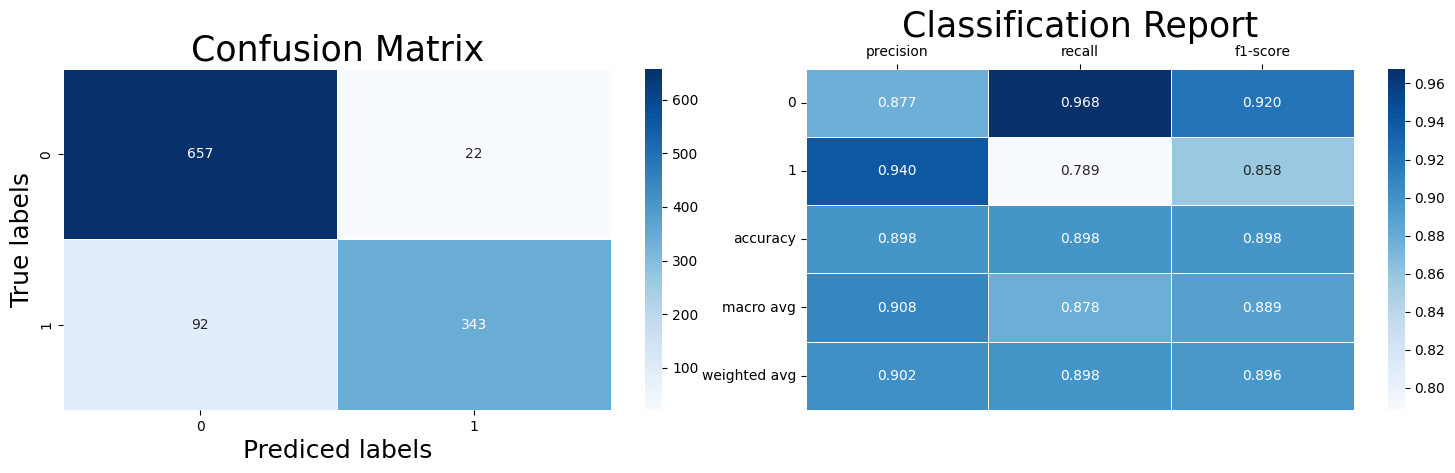

In [33]:
plot_result(y_pred)

## Classification Report

In [34]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       679
           1       0.94      0.79      0.86       435

    accuracy                           0.90      1114
   macro avg       0.91      0.88      0.89      1114
weighted avg       0.90      0.90      0.90      1114



# Train Logistic Regression Model

In [35]:
#  Train the model
lr = LogisticRegression()
hist1 = lr.fit(X_train, y_train)

# Evaluate the model
predictions = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", lr_accuracy)

Accuracy: 0.6104129263913824


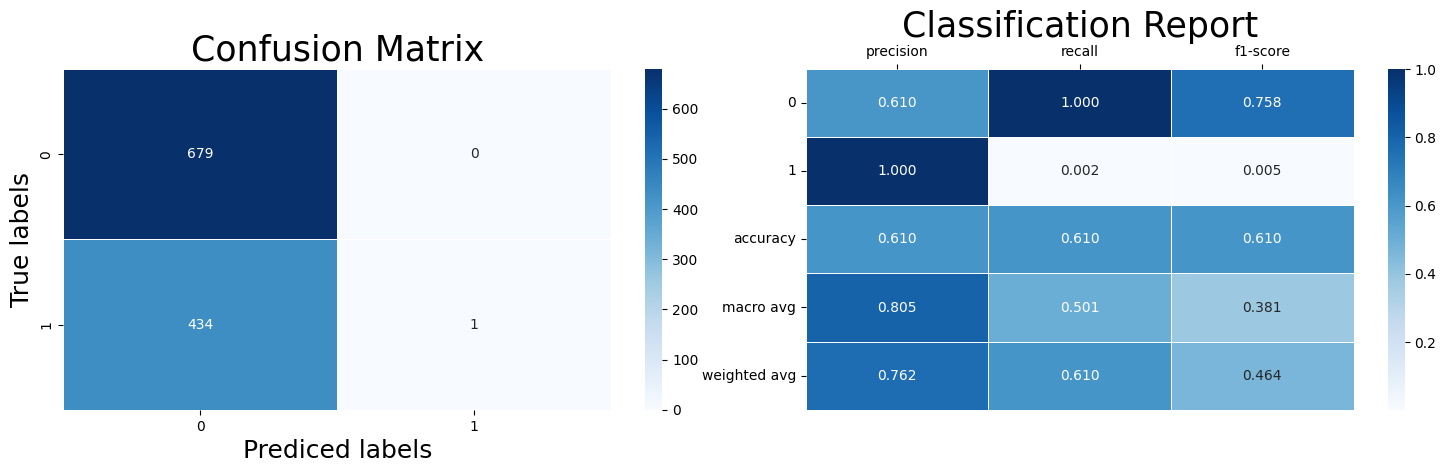

In [36]:
plot_result(predictions)

In [37]:
class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       679
           1       1.00      0.00      0.00       435

    accuracy                           0.61      1114
   macro avg       0.81      0.50      0.38      1114
weighted avg       0.76      0.61      0.46      1114



In [38]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 1, 1000],
    'class_weight' : ['balanced', None],
    'solver' : ['liblinear', 'sag'],
    'penalty' : ['l2'],
    'n_jobs' : [-1],
}

lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=20).fit(X_train, y_train)

print('Tuned hyper parameters :\n{}'.format(lr_cv.best_params_))

Tuned hyper parameters :
{'C': 0.001, 'class_weight': None, 'n_jobs': -1, 'penalty': 'l2', 'solver': 'liblinear'}


In [39]:
lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

lr_score = round(lr.score(X_test, y_test), 3)
print('LogisticRegression Score : {}'.format(lr_score))

LogisticRegression Score : 0.61


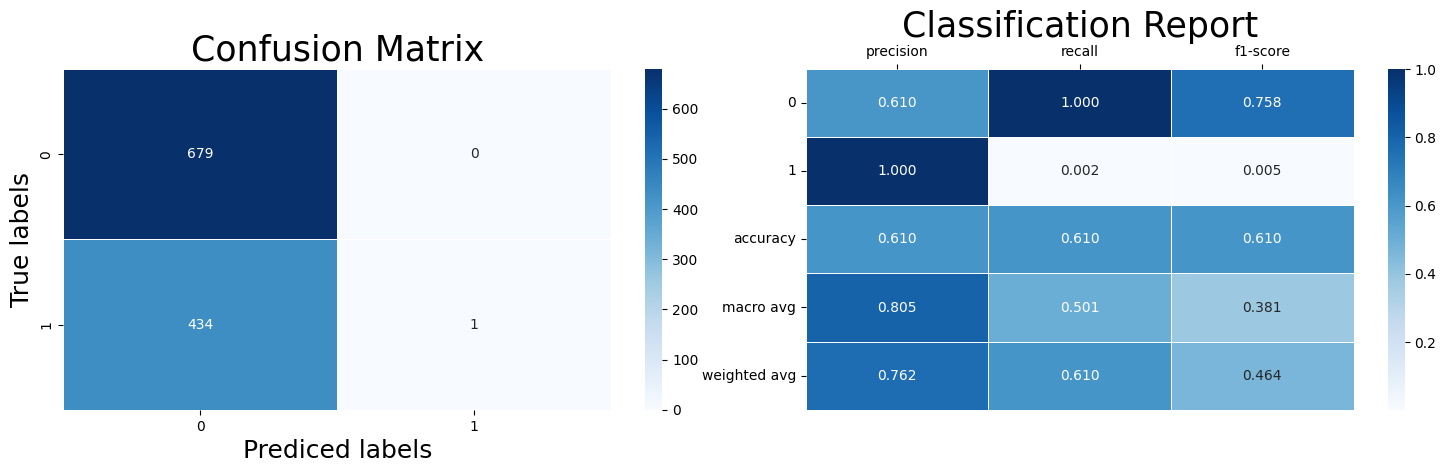

In [40]:
plot_result(y_pred_lr)

# Train MLPClassifier Model

In [41]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'hidden_layer_sizes' : [500],
    'activation' : ['logistic'],
    'alpha' : [0.0001],
    'batch_size' : [200],
    
}

mlp = MLPClassifier()
mlp_cv = GridSearchCV(estimator=mlp, param_grid=parameters, cv=20).fit(X_train, y_train)

print('Tuned hyper parameters :\n{}'.format(mlp_cv.best_params_))

Tuned hyper parameters :
{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 200, 'hidden_layer_sizes': 500}


In [42]:
mlp = MLPClassifier(**mlp_cv.best_params_).fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

mlp_score = round(mlp.score(X_test, y_test), 3)
print('MLPClassifier Score : {}'.format(mlp_score))

MLPClassifier Score : 0.61


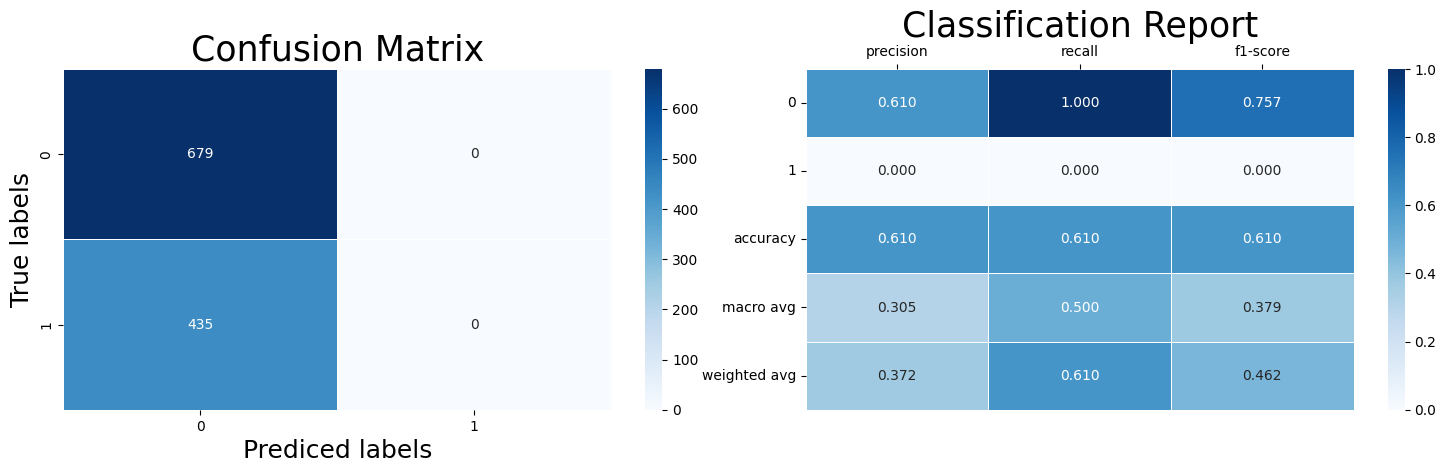

In [43]:
plot_result(y_pred_mlp)

In [44]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_neighbors' : list(np.arange(3, 50, 2)),
    'weights': ['uniform', 'distance'],
    'p' : [1, 2, 3, 4]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters :\n{}'.format(knn_cv.best_params_))

Tuned hyper parameters :
{'n_neighbors': 49, 'p': 2, 'weights': 'distance'}


In [45]:
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

knn_score = round(knn.score(X_test, y_test), 3)
print('KNeighborsClassifier Score : {}'.format(knn_score))

KNeighborsClassifier Score : 0.873


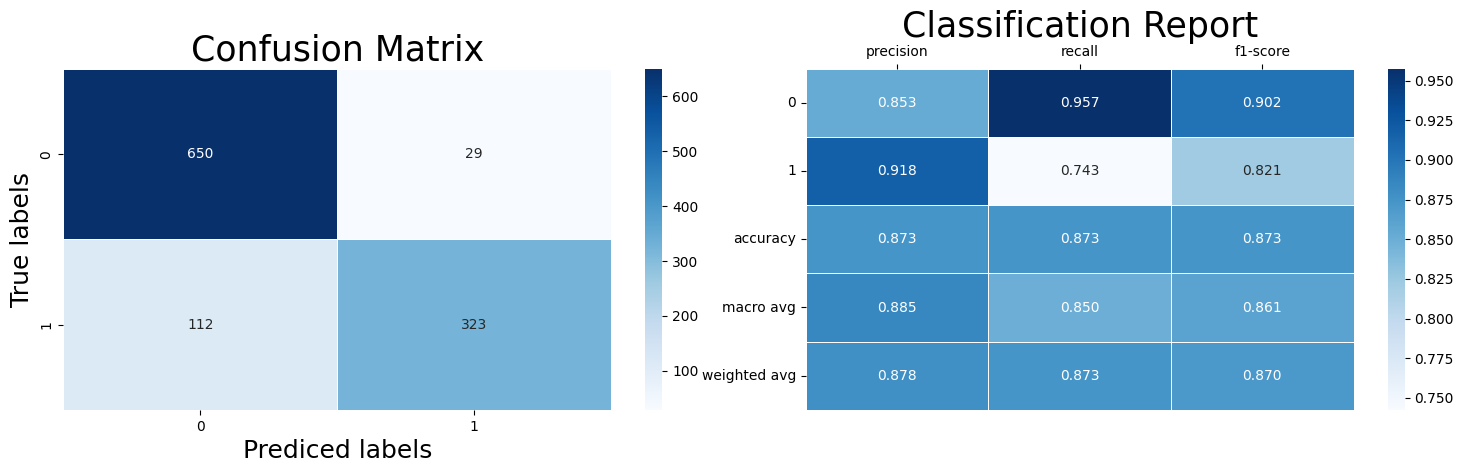

In [46]:
plot_result(y_pred_knn)

## Models Scores

In [47]:
result = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier', 'LogisticRegression', 'KNeighborsClassifier', 'MLPClassifier'],
    'Score' : [rf_score, lr_score,  knn_score, mlp_score]
})


result.style.background_gradient()

,Algorithm,Score
0,RandomForestClassifier,0.898000
1,LogisticRegression,0.610000
2,KNeighborsClassifier,0.873000
3,MLPClassifier,0.610000


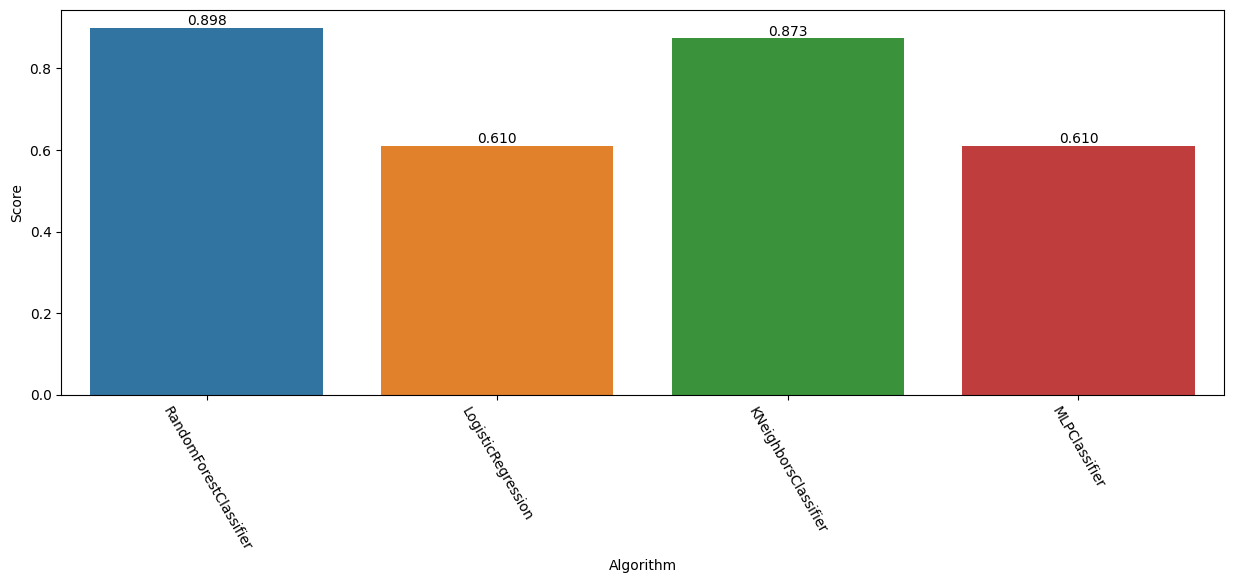

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.barplot(x='Algorithm', y='Score', data=result)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm, rotation=300)
plt.show()

## Save The Best Model

In [49]:
with open(r'potability_random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)